In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

In [13]:
df_x = pd.read_csv('../data/data_input_001.csv', index_col=0)
df_y = pd.read_csv('../data/data_output_001.csv', index_col=0)
display(df_x, df_y)

,x1,x2
0,0.000000,0.000000
1,0.256457,0.000000
2,0.512913,0.000000
3,0.769370,0.000000
4,1.025826,0.000000
...,...,...
2495,11.540544,12.566371
2496,11.797001,12.566371
2497,12.053458,12.566371
2498,12.309914,12.566371


,y1
0,0.944779
1,1.306772
2,1.398010
3,1.725785
4,1.808817
...,...
2495,0.087740
2496,0.352055
2497,0.484539
2498,0.694579


<IPython.core.display.Javascript object>


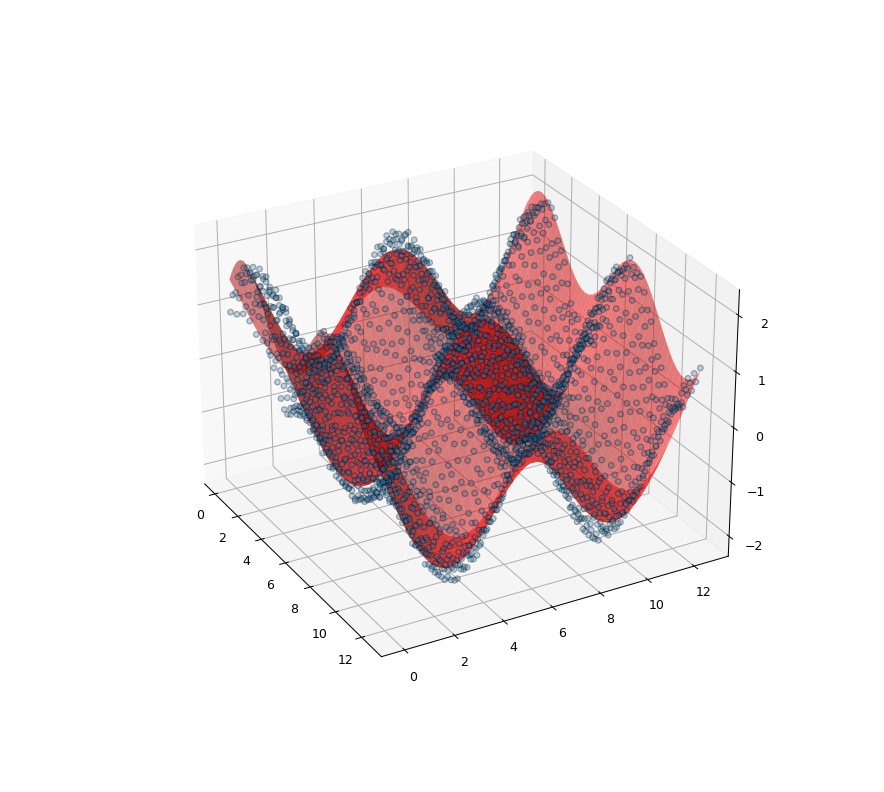

In [16]:
fig = plt.figure()

ax = fig.add_subplot(111,projection='3d')

ax.scatter(df_x['x1'],df_x['x2'],df_y['y1'],
          alpha=0.3,
          edgecolor='black')

In [17]:
sc_x = StandardScaler()
sc_y = StandardScaler()

X = df_x.values
Y = df_y.values
x_s = sc_x.fit_transform(X)
y_s = sc_y.fit_transform(Y)

regressor = SVR(kernel = 'rbf')
regressor.fit(x_s,y_s)

/home/saki606/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [18]:
y_pred = regressor.predict(x_s)
Y_pred = sc_y.inverse_transform(y_pred.reshape(-1,1))


In [21]:
# fig = plt.figure()

num=50

ax.plot_surface(np.array(df_x.x1).reshape(num,num),
                np.array(df_x.x2).reshape(num,num),
                Y_pred.reshape(num,num), 
                color='red', alpha=0.5)

<IPython.core.display.Javascript object>


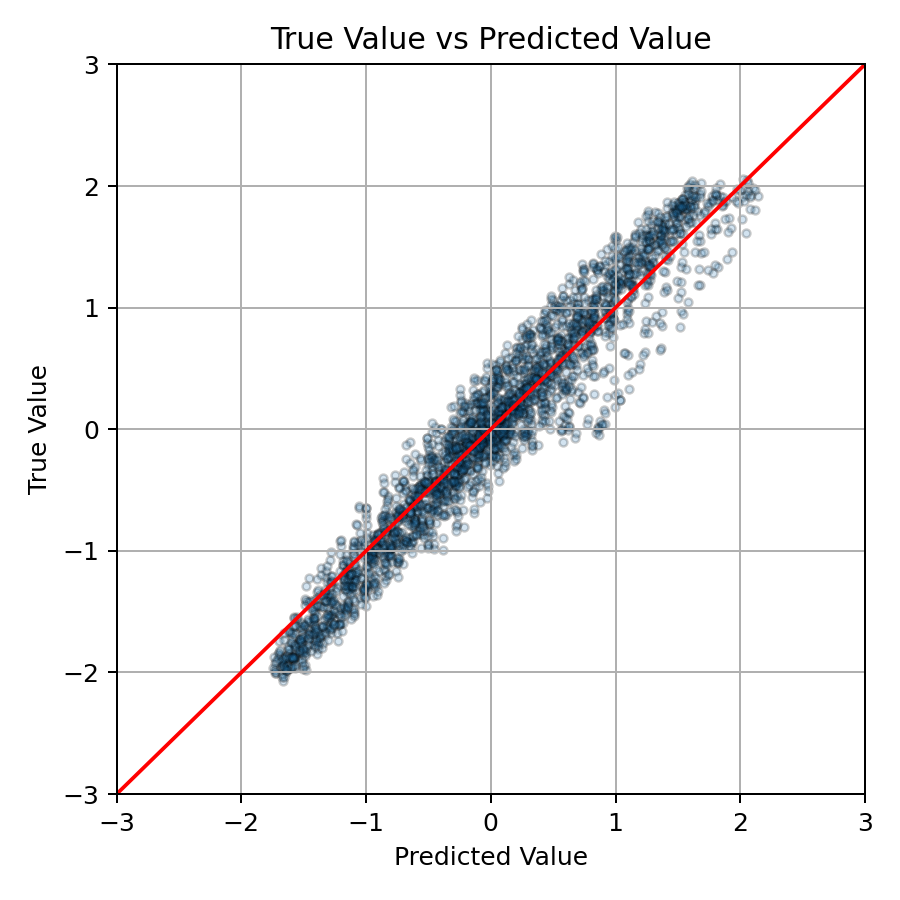

Mean:  0.001678
std:  0.261
MAE:  0.209
MSE:  0.261
R-squred:  0.932
Maximum Error:  0.918


In [23]:
fig = plt.figure(figsize=(5, 5), dpi=200)

ax = fig.add_subplot(111)

ax.scatter(Y_pred,Y,
          alpha=0.2,
          edgecolor='black',
          s=10)

ax.plot([-10,10],[-10,10],c='r')

plt.title("True Value vs Predicted Value")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.grid('True')
plt.xlim(-3,3)
plt.ylim( -3,3)
plt.tight_layout()

YY = Y-Y_pred
print('Mean: ', np.round(np.mean(YY), 6))
print('std: ', np.round(np.std(YY),3))
print('MAE: ', np.round(np.mean(np.abs(YY)),3))
print('MSE: ', np.round(np.sqrt(sklearn.metrics.mean_squared_error(Y,Y_pred)),3))
print('R-squred: ', np.round(sklearn.metrics.r2_score(Y,Y_pred),3))
print('Maximum Error: ', np.round(np.max(np.abs(YY)),3))
